In [1]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# TODO: Fill in the Google Drive path where you uploaded the lab materials
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Lab materials 01-20210104'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'ColabNotebooks/ComputerVision/Course Work/CW_Folder_PG' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['.DS_Store', 'Video', 'CW_Dataset', 'Code', 'Models', 'test_functions.ipynb']


In [3]:
zip_path = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset', 'CW_Dataset-2.zip')

# Copy it to Colab
!cp '{zip_path}' .

# Unzip it
!yes|unzip -q CW_Dataset-2.zip

In [4]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from skimage import img_as_ubyte, io, color
from sklearn.model_selection import train_test_split

In [5]:
def import_training_data(path, folder, lable_list=None):
  """Load training images and lables from folders"""

  images =[]
  labels = []
  file_names = [file for file in sorted(os.listdir(os.path.join(path,folder))) if file.endswith('.jpg')]
  print(file_names)
  for file in file_names:
    images.append(io.imread(os.path.join(path, folder, file)).astype('float32'))
  
  file_names = [file.replace('_aligned','') for file in file_names]
  
  return images, file_names
  


path = '/content/CW_Dataset-2'
images, file_names = import_training_data(path,'train')
print(file_names)

['train_00001_aligned.jpg', 'train_00002_aligned.jpg', 'train_00003_aligned.jpg', 'train_00004_aligned.jpg', 'train_00005_aligned.jpg', 'train_00006_aligned.jpg', 'train_00007_aligned.jpg', 'train_00008_aligned.jpg', 'train_00009_aligned.jpg', 'train_00010_aligned.jpg', 'train_00011_aligned.jpg', 'train_00012_aligned.jpg', 'train_00013_aligned.jpg', 'train_00014_aligned.jpg', 'train_00015_aligned.jpg', 'train_00016_aligned.jpg', 'train_00017_aligned.jpg', 'train_00018_aligned.jpg', 'train_00019_aligned.jpg', 'train_00020_aligned.jpg', 'train_00021_aligned.jpg', 'train_00022_aligned.jpg', 'train_00023_aligned.jpg', 'train_00024_aligned.jpg', 'train_00025_aligned.jpg', 'train_00026_aligned.jpg', 'train_00027_aligned.jpg', 'train_00028_aligned.jpg', 'train_00029_aligned.jpg', 'train_00030_aligned.jpg', 'train_00031_aligned.jpg', 'train_00032_aligned.jpg', 'train_00033_aligned.jpg', 'train_00034_aligned.jpg', 'train_00035_aligned.jpg', 'train_00036_aligned.jpg', 'train_00037_aligned.jpg', 

In [6]:
path = '/content/CW_Dataset-2'
lables_path = os.path.join(path, 'labels')
file_labels= sorted(open(os.path.join(lables_path, 'list_label_train.txt'), "r").readlines())
# content_list = labels.readlines()
file_labels = [line.rstrip('\n') for line in file_labels]
print(file_labels)

labels = [int(label[-1]) for label in file_labels]
print(labels)

['train_00001.jpg 5', 'train_00002.jpg 5', 'train_00003.jpg 4', 'train_00004.jpg 4', 'train_00005.jpg 5', 'train_00006.jpg 1', 'train_00007.jpg 5', 'train_00008.jpg 4', 'train_00009.jpg 4', 'train_00010.jpg 1', 'train_00011.jpg 4', 'train_00012.jpg 1', 'train_00013.jpg 1', 'train_00014.jpg 4', 'train_00015.jpg 5', 'train_00016.jpg 4', 'train_00017.jpg 4', 'train_00018.jpg 4', 'train_00019.jpg 4', 'train_00020.jpg 4', 'train_00021.jpg 4', 'train_00022.jpg 4', 'train_00023.jpg 6', 'train_00024.jpg 5', 'train_00025.jpg 5', 'train_00026.jpg 5', 'train_00027.jpg 2', 'train_00028.jpg 5', 'train_00029.jpg 4', 'train_00030.jpg 5', 'train_00031.jpg 3', 'train_00032.jpg 1', 'train_00033.jpg 5', 'train_00034.jpg 1', 'train_00035.jpg 4', 'train_00036.jpg 4', 'train_00037.jpg 4', 'train_00038.jpg 5', 'train_00039.jpg 5', 'train_00040.jpg 5', 'train_00041.jpg 5', 'train_00042.jpg 5', 'train_00043.jpg 1', 'train_00044.jpg 1', 'train_00045.jpg 4', 'train_00046.jpg 4', 'train_00047.jpg 6', 'train_00048

In [7]:
file_labels_new =[]
for i in file_labels:
  listst = i.split(".")
  new =  listst[0] + '_aligned.' + listst[1]
  file_labels_new.append(new)
# file_labels_new

In [8]:
X_train, X_val, y_train, y_val = train_test_split(file_labels_new, labels, test_size = 0.1)

In [9]:
trainData = path+'/trainData'
os.mkdir(trainData)
for i in range (1,8):  
  os.mkdir(trainData + '/class_' +str(i))

In [11]:
# import glob
# import shutil
# import os

# src_dir = '/content/CW_Dataset-2/train'
# dst_dir = '/content/CW_Dataset-2/trainData'
# files =  sorted(os.listdir(src_dir))
# print(files)
# for i in range (0, len(labels)):
#   shutil.copy(src_dir+'/'+files[i+1], dst_dir+'/class_'+str(labels[i]))

import glob
import shutil
import os

src_dir = '/content/CW_Dataset-2/train'
dst_dir = '/content/CW_Dataset-2/trainData'
files =  sorted(os.listdir(src_dir))
print(files)
for i in range (0, len(X_train)):
  fe = X_train[i].split()
  shutil.copy(src_dir+'/'+fe[0], dst_dir+'/class_'+fe[1])



['.DS_Store', 'train_00001_aligned.jpg', 'train_00002_aligned.jpg', 'train_00003_aligned.jpg', 'train_00004_aligned.jpg', 'train_00005_aligned.jpg', 'train_00006_aligned.jpg', 'train_00007_aligned.jpg', 'train_00008_aligned.jpg', 'train_00009_aligned.jpg', 'train_00010_aligned.jpg', 'train_00011_aligned.jpg', 'train_00012_aligned.jpg', 'train_00013_aligned.jpg', 'train_00014_aligned.jpg', 'train_00015_aligned.jpg', 'train_00016_aligned.jpg', 'train_00017_aligned.jpg', 'train_00018_aligned.jpg', 'train_00019_aligned.jpg', 'train_00020_aligned.jpg', 'train_00021_aligned.jpg', 'train_00022_aligned.jpg', 'train_00023_aligned.jpg', 'train_00024_aligned.jpg', 'train_00025_aligned.jpg', 'train_00026_aligned.jpg', 'train_00027_aligned.jpg', 'train_00028_aligned.jpg', 'train_00029_aligned.jpg', 'train_00030_aligned.jpg', 'train_00031_aligned.jpg', 'train_00032_aligned.jpg', 'train_00033_aligned.jpg', 'train_00034_aligned.jpg', 'train_00035_aligned.jpg', 'train_00036_aligned.jpg', 'train_00037_a

In [12]:
valData = path+'/validationDataset'
os.mkdir(valData)
# for i in range (1,8):  
#   os.mkdir(valData + '/class_' +str(i))

In [13]:
src_dir = '/content/CW_Dataset-2/train'
dst_dir = '/content/CW_Dataset-2/validationDataset'
files =  sorted(os.listdir(src_dir))

for i in range (0, len(X_val)):
  fe = X_val[i].split()
  shutil.copy(src_dir+'/'+fe[0], dst_dir)


In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/CW_Dataset-2/trainData",target_size=(224,224))
vldata = ImageDataGenerator()
valdata = vldata.flow_from_directory(directory="/content/CW_Dataset-2/validationData", target_size=(224,224))

Found 11043 images belonging to 7 classes.
Found 1228 images belonging to 7 classes.


In [ ]:
# valData = path+'/ValidationData'
# os.mkdir(valData)
# for i in range (1,8):  
#   os.mkdir(valData + '/class_' +str(i))

# src_dir = '/content/CW_Dataset-2/train'
# dst_dir = '/content/CW_Dataset-2/trainData'
# files =  sorted(os.listdir(src_dir))
# print(files)
# for i in range (0, len(labels)):
#   shutil.copy(src_dir+'/'+files[i+1], dst_dir+'/class_'+str(labels[i]))

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=7, activation="softmax"))

In [ ]:
from keras.optimizers import adam_v2
opt = adam_v2.Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, 
                          validation_data= valdata, validation_steps=10,
                           epochs=100,callbacks=[checkpoint,early])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 23s 232ms/step - loss: 1.6614 - accuracy: 0.3922
Epoch 2/100
100/100 [==============================] - 23s 233ms/step - loss: 1.6360 - accuracy: 0.3856
Epoch 3/100
100/100 [==============================] - 23s 231ms/step - loss: 1.6418 - accuracy: 0.3999
Epoch 4/100
100/100 [==============================] - 23s 232ms/step - loss: 1.8561 - accuracy: 0.3709
Epoch 5/100
100/100 [==============================] - 23s 232ms/step - loss: 1.6624 - accuracy: 0.3722
Epoch 6/100
100/100 [==============================] - 23s 233ms/step - loss: 1.6567 - accuracy: 0.3900
Epoch 7/100
100/100 [==============================] - 23s 232ms/step - loss: 1.6323 - accuracy: 0.3925
Epoch 8/100
100/100 [==============================] - 23s 233ms/step - loss: 1.6465 - accuracy: 0.3856
Epoch 9/100
100/100 [==============================] - 23s 231ms/step - loss: 1.6421 - accuracy: 0.3958
Epoch 10/100
100/100 [==============================] - 23s 231ms/step - los

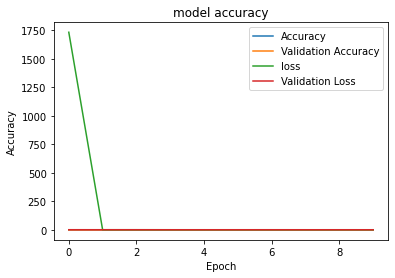

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

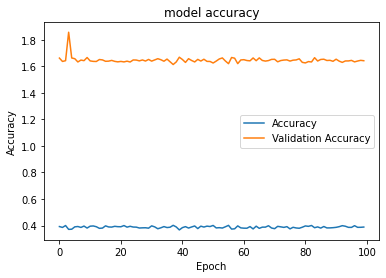

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
# plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
model.save(GOOGLE_DRIVE_PATH+'/Models/CNN')

INFO:tensorflow:Assets written to: drive/My Drive/ColabNotebooks/ComputerVision/Course Work/CW_Folder_PG/Models/CNN/assets


In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(GOOGLE_DRIVE_PATH+'/Models/CNN/model.h5')
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
from keras.models import model_from_json
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights(GOOGLE_DRIVE_PATH+'/Models/CNN/model.h5')
print("Loaded model from disk")

Loaded model from disk


In [ ]:
src_dir = '/content/CW_Dataset-2/train'
dst_dir = '/content/CW_Dataset-2/validationData'
files =  sorted(os.listdir(src_dir))

for i in range (0, len(X_val)):
  fe = X_train[i].split()
  shutil.copy(src_dir+'/'+fe[0], dst_dir+'/class_'+fe[1])

['train_10737_aligned.jpg 7',
 'train_00638_aligned.jpg 1',
 'train_05816_aligned.jpg 4',
 'train_04255_aligned.jpg 4',
 'train_01896_aligned.jpg 4',
 'train_01893_aligned.jpg 3',
 'train_09738_aligned.jpg 3',
 'train_09903_aligned.jpg 7',
 'train_00038_aligned.jpg 5',
 'train_00632_aligned.jpg 4',
 'train_05669_aligned.jpg 4',
 'train_03742_aligned.jpg 3',
 'train_07783_aligned.jpg 4',
 'train_12032_aligned.jpg 7',
 'train_09996_aligned.jpg 7',
 'train_11877_aligned.jpg 7',
 'train_00660_aligned.jpg 5',
 'train_00001_aligned.jpg 5',
 'train_10249_aligned.jpg 7',
 'train_07762_aligned.jpg 4',
 'train_04224_aligned.jpg 5',
 'train_01223_aligned.jpg 5',
 'train_09142_aligned.jpg 4',
 'train_02363_aligned.jpg 4',
 'train_01225_aligned.jpg 4',
 'train_01807_aligned.jpg 4',
 'train_01082_aligned.jpg 4',
 'train_09494_aligned.jpg 3',
 'train_03062_aligned.jpg 4',
 'train_00279_aligned.jpg 4',
 'train_03452_aligned.jpg 4',
 'train_08672_aligned.jpg 4',
 'train_10913_aligned.jpg 7',
 'train_00

In [ ]:
vldata = ImageDataGenerator()
valdata = vldata.flow_from_directory(directory="/content/CW_Dataset-2/validationDataset", target_size=(224,224))

Found 0 images belonging to 0 classes.


In [ ]:
from keras.preprocessing import image
import cv2
import os
hist_list = []

folder = "/content/CW_Dataset-2/validationDataset"

ypredicts =[]

val_image = []
for filename in os.listdir(folder):
    img = image.load_img(os.path.join(folder,filename),target_size=(224,224))
    val_image.append(img)
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    # preds = model.predict_classes(img)
    #ref from : https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes
    predict_x=model.predict(img) 
    classes_x=np.argmax(predict_x,axis=1)
    ypredicts.append(classes_x)

# ypredicts



# Remove potential cases of images with no descriptors
# idx_not_empty = [i for i, x in enumerate(hist_list) if x is not None]
# hist_list = [hist_list[i] for i in idx_not_empty]
# y_test = [labels_test[i] for i in idx_not_empty]
# hist_array = np.vstack(hist_list)
# preds = model.predict(dst_dir = '/content/CW_Dataset-2/validationDataset')

In [ ]:
y_val_class = []
for i in X_val : 
  y_val_class.append(np.array([int(i.split()[1])]))
# y_val_class

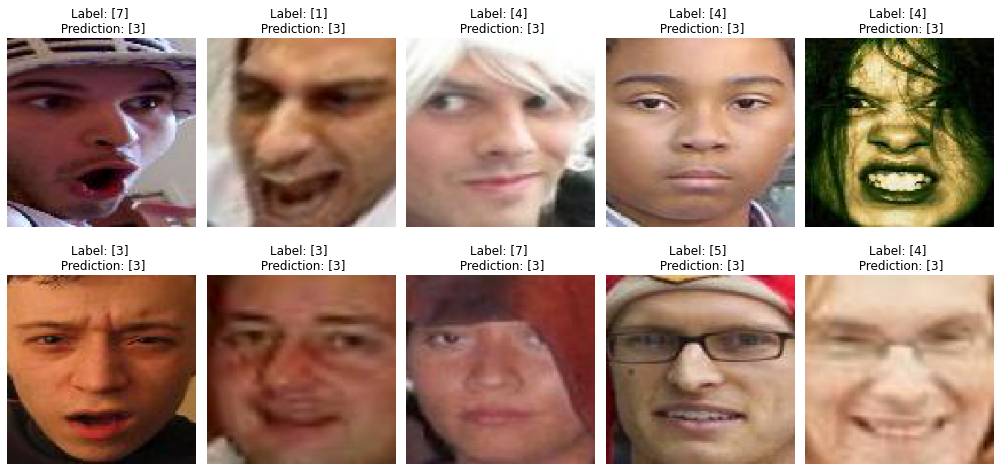

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(10):
    ax[i].imshow(val_image[i])
    ax[i].set_title(f'Label: {y_val_class[i]} \n Prediction: {ypredicts[i]}')
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val_class, ypredicts))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       129
           2       0.00      0.00      0.00        31
           3       0.07      1.00      0.13        85
           4       0.00      0.00      0.00       473
           5       0.00      0.00      0.00       197
           6       0.00      0.00      0.00        62
           7       0.00      0.00      0.00       251

    accuracy                           0.07      1228
   macro avg       0.01      0.14      0.02      1228
weighted avg       0.00      0.07      0.01      1228



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### CNN - With Pre Trained



In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy

%matplotlib inline

In [18]:
data_dir = '/content/CW_Dataset-2'
data_means = [0.485, 0.456, 0.406]
data_stds = [0.229, 0.224, 0.225]

In [16]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(data_means, data_stds)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(data_means, data_stds)
    ]),
}

In [25]:
val = path+'/valData'
os.mkdir(val)
for i in range (1,8):  
  os.mkdir(val + '/class_' +str(i))
src_dir = '/content/CW_Dataset-2/train'
dst_dir = '/content/CW_Dataset-2/valData'
files =  sorted(os.listdir(src_dir))

for i in range (0, len(X_val)):
  fe = X_val[i].split()
  shutil.copy(src_dir+'/'+fe[0], dst_dir+'/class_'+fe[1])

In [19]:
datasets.ImageFolder(os.path.join(data_dir, 'trainData'),
                                          data_transforms['train'])

Dataset ImageFolder
    Number of datapoints: 11043
    Root location: /content/CW_Dataset-2/trainData
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [29]:
image_datasets = {x[0]: datasets.ImageFolder(os.path.join(data_dir, x[0]),
                                          data_transforms[x[1]])
                  for x in [('trainData','train'),('valData','val')]}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=2)
              for x in ['trainData', 'valData']}

In [30]:
image_datasets

{'trainData': Dataset ImageFolder
     Number of datapoints: 11043
     Root location: /content/CW_Dataset-2/trainData
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ), 'valData': Dataset ImageFolder
     Number of datapoints: 1228
     Root location: /content/CW_Dataset-2/valData
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            )}

In [24]:
image_datasets

{'trainData': Dataset ImageFolder
     Number of datapoints: 11043
     Root location: /content/CW_Dataset-2/trainData
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            )}

In [31]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['trainData', 'valData']}
class_names = image_datasets['trainData'].classes

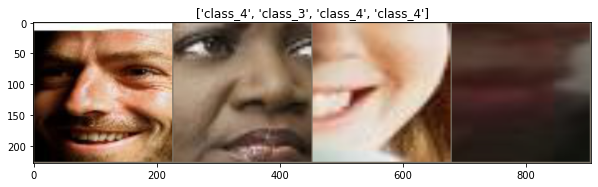

In [33]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.asarray(data_stds) * inp + np.asarray(data_means)
    inp = np.clip(inp, 0, 1)       # Clip to intensity outliers to [0, 1] range
    plt.imshow(inp)
    if title is not None:
        plt.title(title)


# Get a batch of training data
first_inputs, first_classes = next(iter(dataloaders['trainData']))

# Make a grid from batch
out = torchvision.utils.make_grid(first_inputs)

plt.figure(figsize=(10, 15))
imshow(out, title=[class_names[x] for x in first_classes])
plt.show()

### Training the Model

Basic model to understand how the model adapts to data

In [34]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch}/{num_epochs - 1}")
        print('----------------')

        # Each epoch has a training and validation phase
        for phase in ['trainData', 'valData']:
            if phase == 'trainData':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                # move data to GPU
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'trainData'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'trainData':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            # update learning rate with scheduler
            if phase == 'trainData':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} loss: {epoch_loss:.4f} acc: {epoch_acc:.4f}")

            # deep copy the model with best accuracy on validation set
            if phase == 'valData' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f"Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")
    print(f"Best val acc: {best_acc:4f}")

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

### Visualizing the model Prediction



In [35]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['valData']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f"Predicted: {class_names[preds[j]]}")
                imshow(inputs.cpu().data[j])        # move back the data to the CPU for visualisation

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [36]:
model_ft = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [37]:
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

In [38]:
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

### Train and Evaluate



In [40]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=100)

Epoch 0/99
----------------
trainData loss: 1.0036 acc: 0.6426
valData loss: 0.6680 acc: 0.7671

Epoch 1/99
----------------
trainData loss: 0.9562 acc: 0.6578
valData loss: 0.6789 acc: 0.7557

Epoch 2/99
----------------
trainData loss: 0.9099 acc: 0.6781
valData loss: 0.6101 acc: 0.7842

Epoch 3/99
----------------
trainData loss: 0.8796 acc: 0.6869
valData loss: 0.6007 acc: 0.7850

Epoch 4/99
----------------
trainData loss: 0.7568 acc: 0.7291
valData loss: 0.5188 acc: 0.8111

Epoch 5/99
----------------
trainData loss: 0.7210 acc: 0.7441
valData loss: 0.5124 acc: 0.8282

Epoch 6/99
----------------
trainData loss: 0.7162 acc: 0.7523
valData loss: 0.5159 acc: 0.8249

Epoch 7/99
----------------
trainData loss: 0.7017 acc: 0.7576
valData loss: 0.5112 acc: 0.8225

Epoch 8/99
----------------
trainData loss: 0.6823 acc: 0.7650
valData loss: 0.4940 acc: 0.8200

Epoch 9/99
----------------
trainData loss: 0.6805 acc: 0.7607
valData loss: 0.5028 acc: 0.8298

Epoch 10/99
----------------
t

Total time taken for the above fit : 2 Hours 12 Minutes

In [ ]:
model_ft

Saving Model

In [41]:
torch.save(model_ft.state_dict(), 'CNN_model.pth')

In [58]:
path = GOOGLE_DRIVE_PATH + '/Models/Trial1_CNN_Model.pth'
torch.save(model_ft.state_dict(), path) # nothing else here

RuntimeError: ignored

In [50]:
import joblib
torch.save(model_ft, GOOGLE_DRIVE_PATH + '/Models/Trial1_CNN_Model.pth')

RuntimeError: ignored

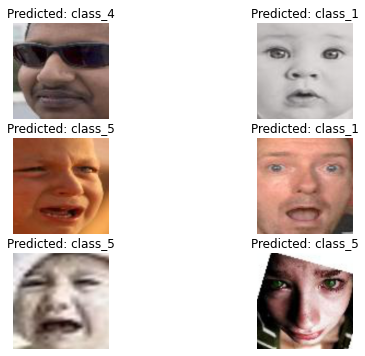

In [43]:
plt.figure(figsize=(8, 6))
visualize_model(model_ft)
plt.show()

In [60]:
torch.save(model_ft, 'model1.pth')

RuntimeError: ignored

In [53]:
# model_ret = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
# model_ret.load_state_dict(torch.load('CNN_model.pth', map_location="cuda:0"))
# model_ret.eval()

In [61]:
torch.save(model_ft.state_dict(), 'model1.pth')

RuntimeError: ignored

In [62]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  